In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/improved-cicids2017-and-csecicids2018/CICIDS2017_improved/tuesday.csv
/kaggle/input/improved-cicids2017-and-csecicids2018/CICIDS2017_improved/monday.csv
/kaggle/input/improved-cicids2017-and-csecicids2018/CICIDS2017_improved/friday.csv
/kaggle/input/improved-cicids2017-and-csecicids2018/CICIDS2017_improved/wednesday.csv
/kaggle/input/improved-cicids2017-and-csecicids2018/CICIDS2017_improved/thursday.csv
/kaggle/input/improved-cicids2017-and-csecicids2018/CSECICIDS2018_improved/Friday-02-03-2018.csv
/kaggle/input/improved-cicids2017-and-csecicids2018/CSECICIDS2018_improved/Thursday-01-03-2018.csv
/kaggle/input/improved-cicids2017-and-csecicids2018/CSECICIDS2018_improved/Thursday-22-02-2018.csv
/kaggle/input/improved-cicids2017-and-csecicids2018/CSECICIDS2018_improved/Wednesday-21-02-2018.csv
/kaggle/input/improved-cicids2017-and-csecicids2018/CSECICIDS2018_improved/Wednesday-14-02-2018.csv
/kaggle/input/improved-cicids2017-and-csecicids2018/CSECICIDS2018_improved/Friday-16

In [2]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

import matplotlib.pyplot as plt

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Data preprocessing

In [3]:
df=pd.read_csv("/kaggle/input/improved-cicids2017-and-csecicids2018/CICIDS2017_improved/friday.csv")
df.head(10) 

,id,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Total TCP Flow Time,Label,Attempted Category
0,1,192.168.10.50-192.168.10.3-56108-3268-6,192.168.10.50,56108,192.168.10.3,3268,6,2017-07-07 11:59:50.315195,112740690,32,...,343,1.610540e+07,4.988048e+05,16399772,15375229,-1,-1,112740690,BENIGN,-1
1,2,192.168.10.50-192.168.10.3-42144-389-6,192.168.10.50,42144,192.168.10.3,389,6,2017-07-07 11:59:50.316273,112740560,32,...,285,1.610543e+07,4.987937e+05,16399782,15375263,-1,-1,112740560,BENIGN,-1
2,3,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,2017-07-07 12:00:31.388567,113757377,545,...,19,1.221036e+07,6.935824e+06,20757030,5504997,-1,-1,0,BENIGN,-1
3,4,192.168.10.25-224.0.0.251-5353-5353-17,192.168.10.25,5353,224.0.0.251,5353,17,2017-07-07 12:00:42.903850,91997219,388,...,16,1.319764e+07,5.826905e+06,19776791,5817470,-1,-1,0,BENIGN,-1
4,5,192.168.10.25-17.253.14.125-123-123-17,192.168.10.25,123,17.253.14.125,123,17,2017-07-07 12:00:42.430758,66966070,6,...,1968172,6.497443e+07,0.000000e+00,64974431,64974431,-1,-1,0,BENIGN,-1
5,6,192.168.10.5-192.168.10.3-123-123-17,192.168.10.5,123,192.168.10.3,123,17,2017-07-07 12:00:53.296592,66137889,6,...,1500785,6.463703e+07,0.000000e+00,64637028,64637028,-1,-1,0,BENIGN,-1
6,7,192.168.10.5-192.168.10.3-49159-445-6,192.168.10.5,49159,192.168.10.3,445,6,2017-07-07 12:00:50.241989,106176490,124,...,43,2.102008e+07,1.237816e+07,30004236,5349458,-1,-1,106176490,BENIGN,-1
7,8,192.168.10.5-134.170.115.55-49176-443-6,192.168.10.5,49176,134.170.115.55,443,6,2017-07-07 12:00:55.280312,79593267,10,...,83707,3.945696e+07,2.068116e+07,54080751,24833175,-1,-1,79593267,BENIGN,-1
8,9,192.168.10.9-192.168.10.3-123-123-17,192.168.10.9,123,192.168.10.3,123,17,2017-07-07 12:01:07.159677,64318195,4,...,101,6.431801e+07,0.000000e+00,64318007,64318007,-1,-1,0,BENIGN,-1
9,10,192.168.10.14-192.168.10.3-49414-445-6,192.168.10.14,49414,192.168.10.3,445,6,2017-07-07 12:00:48.901484,116933759,206,...,36,1.908480e+07,1.204026e+07,30000694,5323604,-1,-1,116933759,BENIGN,-1


In [4]:
df.describe()

,id,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ICMP Code,ICMP Type,Total TCP Flow Time,Attempted Category
count,547557.000000,547557.000000,547557.000000,547557.000000,5.475570e+05,547557.000000,547557.000000,547557.000000,5.475570e+05,547557.000000,...,5.475570e+05,5.475570e+05,5.475570e+05,5.475570e+05,5.475570e+05,5.475570e+05,547557.000000,547557.000000,5.475570e+05,547557.000000
mean,273779.000000,47158.825030,2826.089161,9.785144,9.252255e+06,8.726116,9.444566,374.740299,1.408719e+04,129.866494,...,2.023936e+05,1.125818e+05,3.610678e+06,1.455170e+05,3.716373e+06,3.451524e+06,-0.999262,-0.998444,1.561664e+07,-0.985145
std,158066.235011,16039.868513,8604.258903,5.233530,2.609339e+07,648.644128,874.427110,3088.263160,1.958688e+06,495.923430,...,1.071617e+06,6.682971e+05,1.149280e+07,1.870863e+06,1.182962e+07,1.131402e+07,0.050051,0.093615,1.899453e+08,0.171725
min,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,-1.000000,0.000000e+00,-1.000000
25%,136890.000000,39606.000000,53.000000,6.000000,7.100000e+01,1.000000,1.000000,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,-1.000000,0.000000e+00,-1.000000
50%,273779.000000,52332.000000,80.000000,6.000000,3.114100e+04,2.000000,2.000000,41.000000,1.680000e+02,27.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,-1.000000,4.800000e+01,-1.000000
75%,410668.000000,59207.000000,1055.000000,17.000000,5.032396e+06,8.000000,5.000000,88.000000,4.158000e+03,47.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,-1.000000,4.507917e+06,-1.000000
max,547557.000000,65535.000000,65525.000000,17.000000,1.200000e+08,207963.000000,284603.000000,624776.000000,6.270395e+08,24820.000000,...,1.100975e+08,1.100975e+08,1.199912e+08,7.663521e+07,1.199912e+08,1.199912e+08,10.000000,8.000000,2.676050e+10,1.000000


In [5]:
df.shape

(547557, 91)

## Data cleaning

In [6]:
def clean_data(df):
    df.columns=df.columns.str.strip()
    df.drop(columns=["id","Flow ID","Attempted Category","Timestamp","Src IP","Dst IP"],axis=1,inplace=True)
    pd.set_option('use_inf_as_na',True)
    df.dropna(axis=0,how='any',inplace=True)
    

In [7]:
df.columns=df.columns.str.strip()
df.columns

Index(['id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd RST Flags',
       'Bwd RST Flags', 'Fwd Header Length', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min',
       'Packet Length Max', 'Packet Length

In [8]:
cat=(df.dtypes=='object')
cat[cat==True]

Flow ID      True
Src IP       True
Dst IP       True
Timestamp    True
Label        True
dtype: bool

In [9]:
#removing categorical features and irrelevent columns
df.drop(columns=["id","Flow ID","Attempted Category","Timestamp","Src IP","Dst IP"],axis=1,inplace=True)

In [10]:
df["Label"].value_counts()

Label
BENIGN                288544
Portscan              159066
DDoS                   95144
Botnet - Attempted      4067
Botnet                   736
Name: count, dtype: int64

In [11]:
#testing for null values
df.isnull().sum().sum()

0

In [12]:
#testing for inf values
pd.set_option('use_inf_as_na',True)
vc=df.isnull().sum()
vc[vc!=0]

/tmp/ipykernel_19/222098304.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na',True)


Series([], dtype: int64)

In [13]:
#removing null values and inf values
df.dropna(axis=0,how='any',inplace=True)

In [14]:
def label_map(label):
    if label in (0,1): #important for reusability
        return label
    elif label == 'BENIGN':
        return 0
    else:
        return 1

In [15]:
df['Label'] = df['Label'].apply(label_map)
df['Label'].value_counts()

Label
0    288544
1    259013
Name: count, dtype: int64

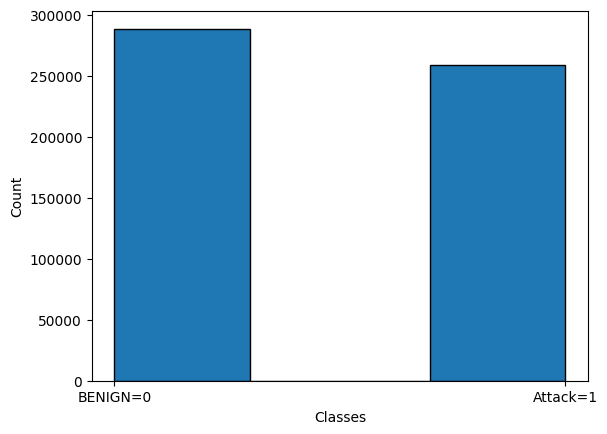

Label
0    288544
1    259013
Name: count, dtype: int64

In [16]:
# Target Class distribution
plt.hist(df['Label'], bins=[0, 0.3,0.7,1], edgecolor='black') # Specify bin 
plt.xticks([0, 1], labels = ['BENIGN=0', 'Attack=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()
df['Label'].value_counts()

In [17]:
# Split data into features and target variable
c=df.shape[1]
X = df.iloc[:,:c-1]
y = df['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (383289, 84)
The test dataset size =  (164268, 84)


# Training
## random forest

In [18]:
# uncomment to retrain
# !rm -rf /kaggle/working/rf.joblib

#load pretrained model
try:
    with open('/kaggle/working/rf.joblib', 'rb') as f:
        rf_model = pickle.load(f)
except Exception as e:
    print(e)
    rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    with open('/kaggle/working/rf.joblib', 'wb') as f:
        pickle.dump(rf_model, f)

#train and save model
rf_pred = rf_model.predict(X_test)


[Errno 2] No such file or directory: '/kaggle/working/rf.joblib'


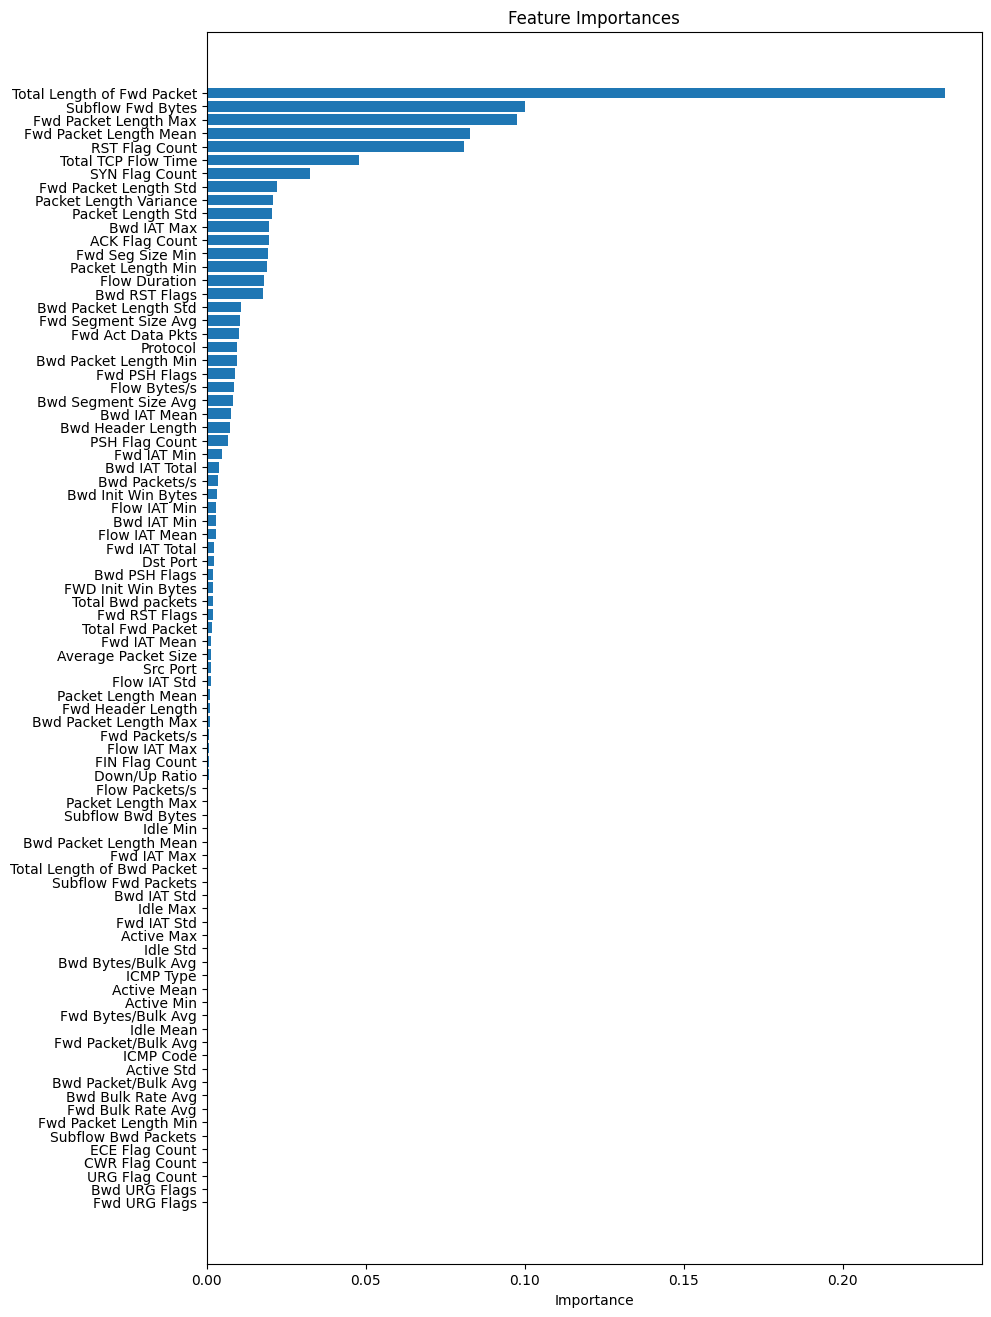

In [19]:
# Getting feature importances from the trained model
importances = rf_model.feature_importances_

# Getting the indices of features sorted by importance
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)
feature_names = [df.columns[i] for i in indices]  # Replace with your column names

# Plotting feature importances horizontally
plt.figure(figsize=(10, 16))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.show()

Double click to zoom


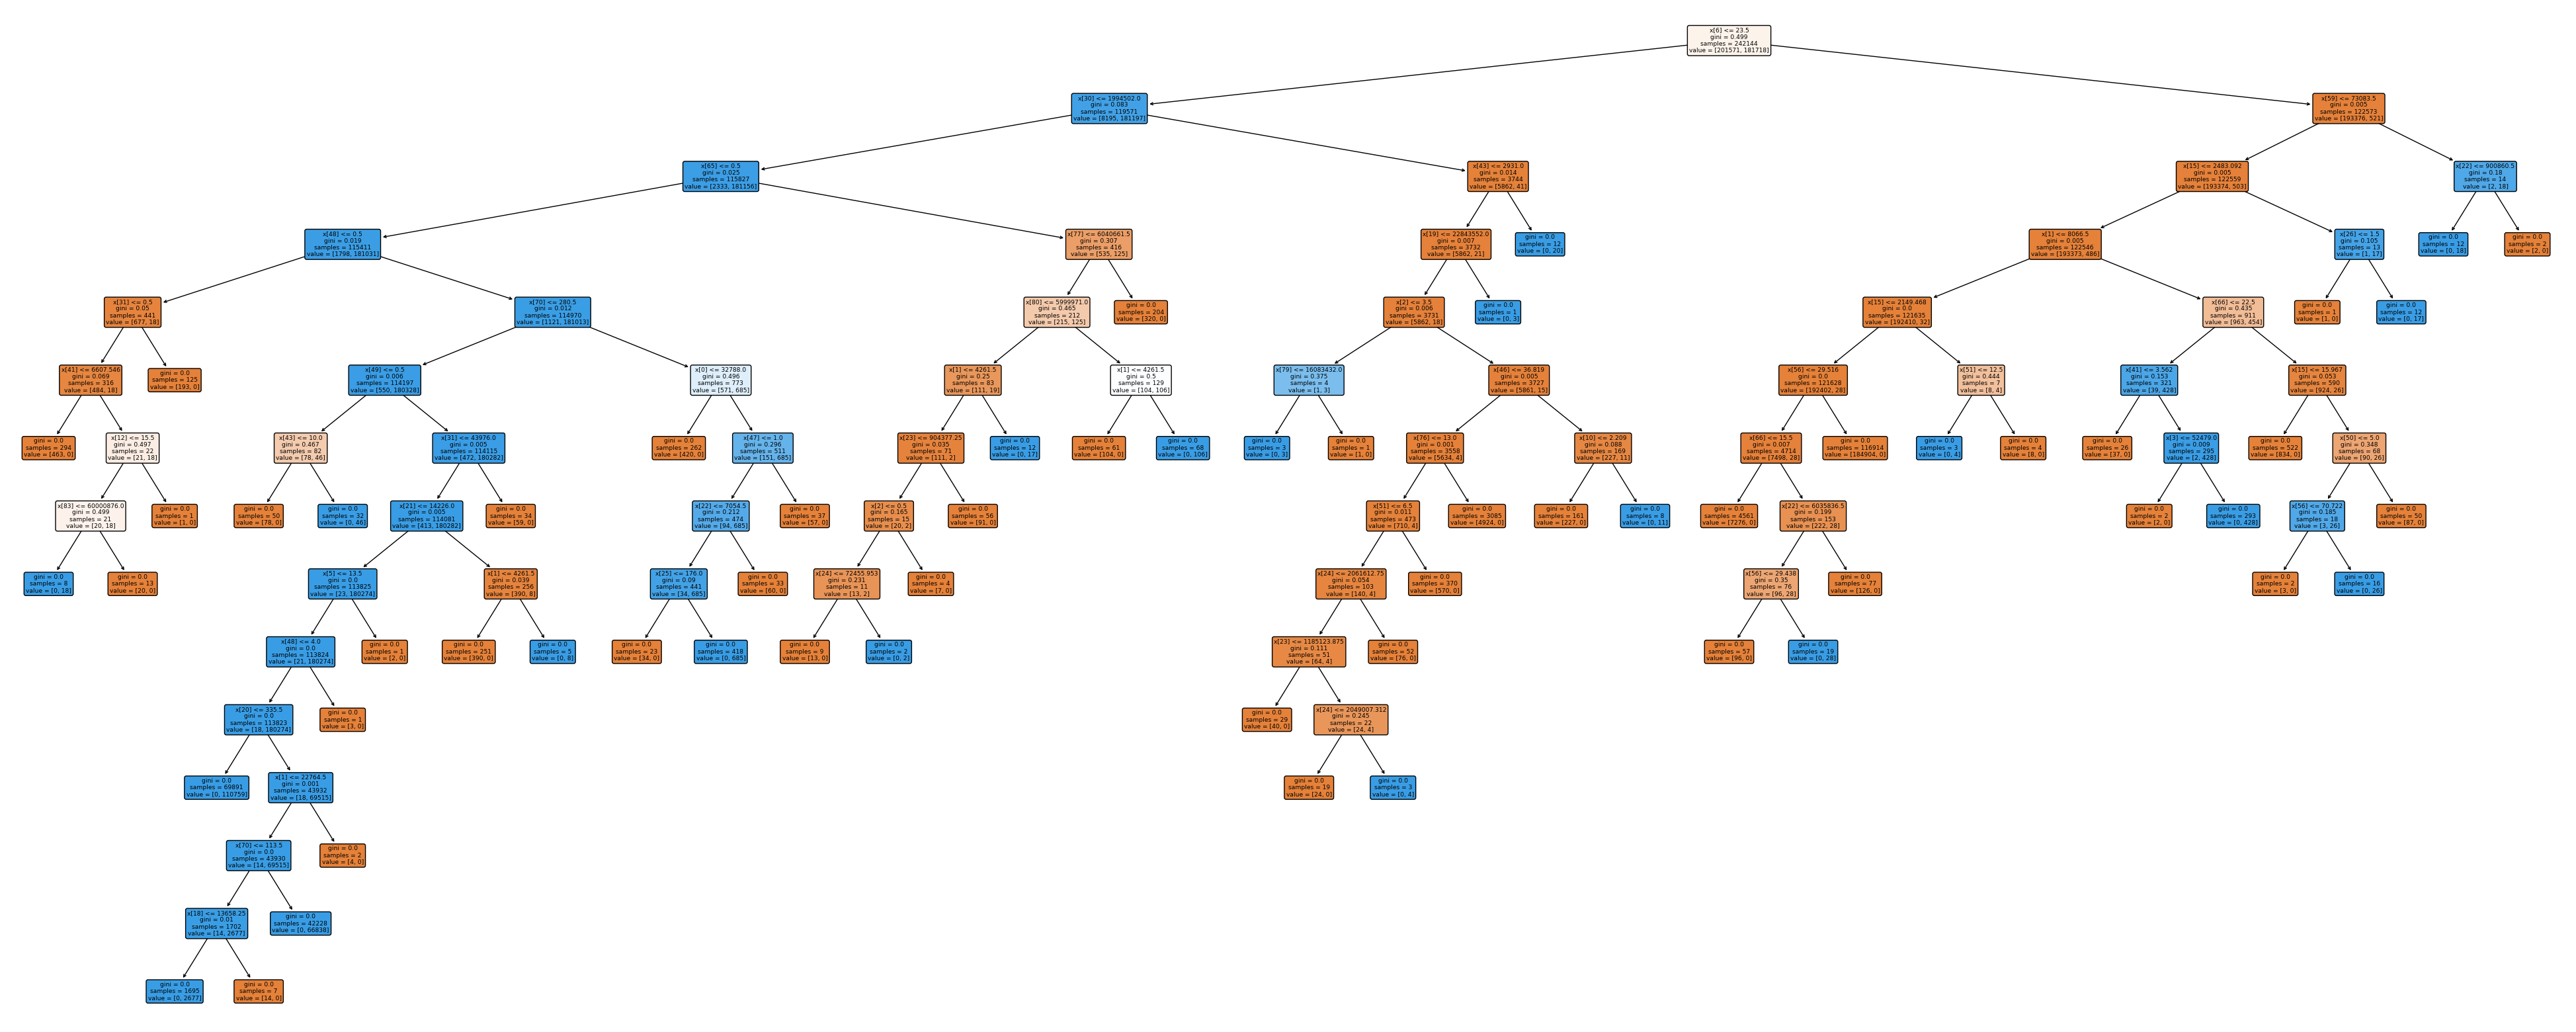

In [20]:
from sklearn.tree import plot_tree

estimator = rf_model.estimators_[0]  # Selecting the first estimator from the random forest model


plt.figure(figsize=(50, 20))
plot_tree(estimator, filled=True, rounded=True)
print("Double click to zoom")
plt.show()

In [21]:
# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [22]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')


Random Forest Metrics:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 0.9999


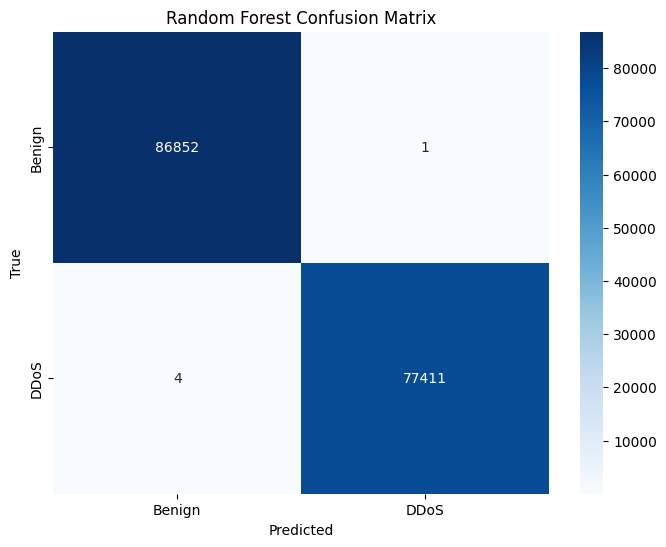

In [23]:
# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

## KNN

In [24]:
#remove comment to retrain knn:
# !rm -rf /kaggle/working/knn.joblib 

from sklearn.neighbors import KNeighborsClassifier

try:
    with open('/kaggle/working/knn.joblib', 'rb') as f:
        knn = pickle.load(f)
except Exception as e:
    print(e)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    with open('/kaggle/working/knn.joblib', 'wb') as f:
        pickle.dump(knn, f)

[Errno 2] No such file or directory: '/kaggle/working/knn.joblib'


In [25]:
# !rm -rf /kaggle/working/knn_pred.joblib
try:
    with open('/kaggle/working/knn_pred.joblib', 'rb') as f:
        y_pred = pickle.load(f)
except Exception as e:
    y_pred = knn.predict(X_test)
    with open('/kaggle/working/knn_pred.joblib', 'wb') as f:
        pickle.dump(y_pred,f)


# Evaluate Random Forest
knn_accuracy = accuracy_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)

print('\nKNN Metrics:')
print(f'Accuracy: {knn_accuracy:.4f}')
print(f'F1 Score: {knn_f1:.4f}')
print(f'Precision: {knn_precision:.4f}')
print(f'Recall: {knn_recall:.4f}')


KNN Metrics:
Accuracy: 0.9995
F1 Score: 0.9995
Precision: 0.9992
Recall: 0.9999


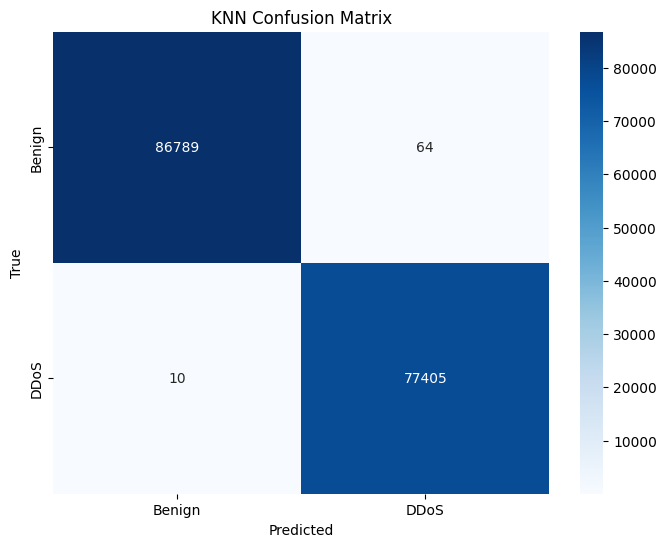

In [26]:
plot_confusion_matrix(y_test, y_pred, ['Benign', 'DDoS'], 'KNN Confusion Matrix')

## logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


#Standard scaler pipeline for data (scaling data)
scaled_lr_model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42,max_iter=1000))

scaled_lr_model.fit(X_train, y_train)

lr_pred = scaled_lr_model.predict(X_test)

In [28]:
# Evaluate Logistic Regression
logisticreg_accuracy = accuracy_score(y_test, lr_pred)
logisticreg_f1 = f1_score(y_test, lr_pred)
logisticreg_precision = precision_score(y_test, lr_pred)
logisticreg_recall = recall_score(y_test, lr_pred)

print('\nLogistic Regression Metrics:')
print(f'Accuracy: {logisticreg_accuracy:.4f}')
print(f'F1 Score: {logisticreg_f1:.4f}')
print(f'Precision: {logisticreg_precision:.4f}')
print(f'Recall: {logisticreg_recall:.4f}')


Logistic Regression Metrics:
Accuracy: 0.9975
F1 Score: 0.9973
Precision: 0.9956
Recall: 0.9990


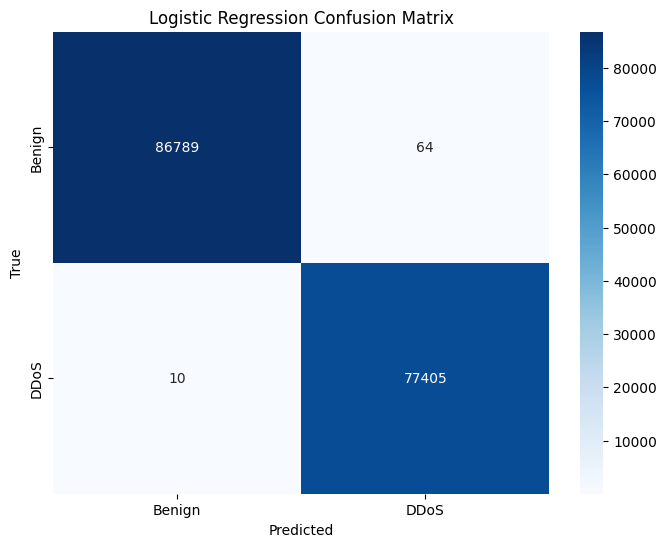

In [29]:
plot_confusion_matrix(y_test, y_pred, ['Benign', 'DDoS'], 'Logistic Regression Confusion Matrix')

## Voting classifer

In [30]:
#Uncomment to retrain model
# !rm -rf /kaggle/working/voting_pred.joblib

from sklearn.ensemble import VotingClassifier

try:
    with open('/kaggle/working/voting.joblib', 'rb') as f:
        voting_clf = pickle.load(f)
except Exception as e:
    print(e)
    voting_clf=VotingClassifier([("logistic regression",scaled_lr_model),("random forest",rf_model),("KNN",knn)],voting="hard")
    voting_clf.fit(X_train,y_train)
    with open('/kaggle/working/voting.joblib', 'wb') as f:
        pickle.dump(voting_clf,f)

[Errno 2] No such file or directory: '/kaggle/working/voting.joblib'


In [31]:
# Evaluate Voting classifier
# !rm -rf /kaggle/working/voting_pred.joblib
try:
    with open('/kaggle/working/voting_pred.joblib', 'rb') as f:
        y_pred = pickle.load(f)
except Exception as e:
    y_pred = knn.predict(X_test)
    with open('/kaggle/working/voting_pred.joblib', 'wb') as f:
        y_pred = voting_clf.predict(X_test)
        pickle.dump(y_pred,f)
        
        
voting_accuracy = accuracy_score(y_test, y_pred)
voting_f1 = f1_score(y_test, y_pred)
voting_precision = precision_score(y_test, y_pred)
voting_recall = recall_score(y_test, y_pred)

print('\nVoting classifier Metrics:')
print(f'Accuracy: {voting_accuracy:.4f}')
print(f'F1 Score: {voting_f1:.4f}')
print(f'Precision: {voting_precision:.4f}')
print(f'Recall: {voting_recall:.4f}')


Voting classifier Metrics:
Accuracy: 0.9999
F1 Score: 0.9999
Precision: 0.9999
Recall: 0.9999


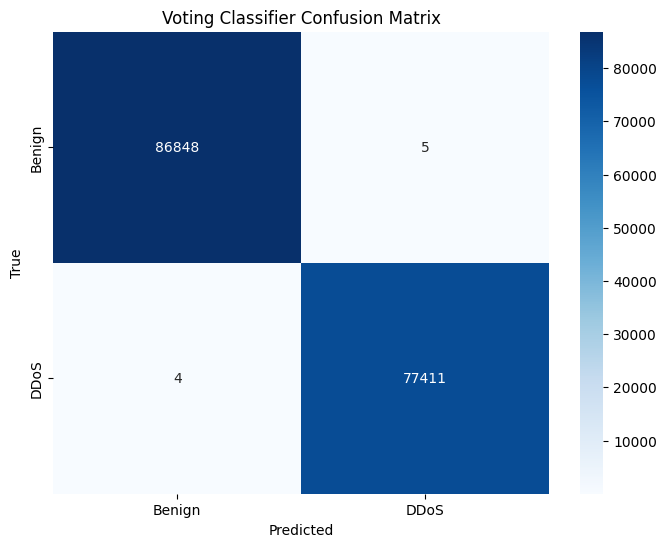

In [32]:
plot_confusion_matrix(y_test, y_pred, ['Benign', 'DDoS'], 'Voting Classifier Confusion Matrix')

# Models Evaluation

In [33]:
print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')

print('\nKNN Metrics:')
print(f'Accuracy: {knn_accuracy:.4f}')
print(f'F1 Score: {knn_f1:.4f}')
print(f'Precision: {knn_precision:.4f}')
print(f'Recall: {knn_recall:.4f}')

print('\nLogistic Regression Metrics:')
print(f'Accuracy: {logisticreg_accuracy:.4f}')
print(f'F1 Score: {logisticreg_f1:.4f}')
print(f'Precision: {logisticreg_precision:.4f}')
print(f'Recall: {logisticreg_recall:.4f}')

print('\nVoting classifier Metrics:')
print(f'Accuracy: {voting_accuracy:.4f}')
print(f'F1 Score: {voting_f1:.4f}')
print(f'Precision: {voting_precision:.4f}')
print(f'Recall: {voting_recall:.4f}')


Random Forest Metrics:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 0.9999

KNN Metrics:
Accuracy: 0.9995
F1 Score: 0.9995
Precision: 0.9992
Recall: 0.9999

Logistic Regression Metrics:
Accuracy: 0.9975
F1 Score: 0.9973
Precision: 0.9956
Recall: 0.9990

Voting classifier Metrics:
Accuracy: 0.9999
F1 Score: 0.9999
Precision: 0.9999
Recall: 0.9999


In [34]:
# !rm -rf /kaggle/working/NN.joblib

from sklearn.neural_network import MLPClassifier

try:
    with open('/kaggle/working/NN.joblib', 'rb') as f:
        nn_model = pickle.load(f)
except Exception as e:
    print(e)
    nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, random_state=42)
    nn_model.fit(X_train, y_train)
    nn_model.fit(X_train, y_train)
    with open('/kaggle/working/NN.joblib', 'wb') as f:
        pickle.dump(nn_model,f)

[Errno 2] No such file or directory: '/kaggle/working/NN.joblib'


In [35]:
nn_pred = nn_model.predict(X_test)

nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')


Neural Network Metrics:
Accuracy: 0.9294
F1 Score: 0.9303
Precision: 0.8701
Recall: 0.9994


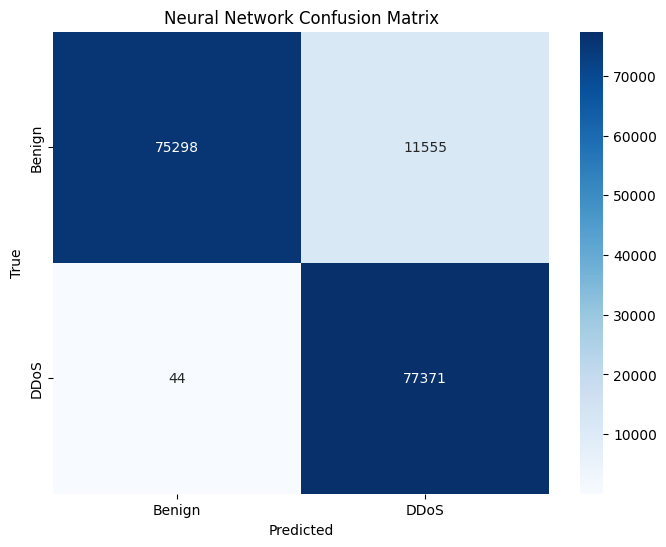

In [36]:
# Confusion Matrix for Neural Network
plot_confusion_matrix(y_test, nn_pred, ['Benign', 'DDoS'], 'Neural Network Confusion Matrix')

In [37]:
#voting classifier v2
voting_clf2=VotingClassifier([("Neurtal Network",nn_model),("random forest",rf_model),("KNN",knn)],voting="hard")
voting_clf2.fit(X_train,y_train)

VotingClassifier(estimators=[('Neurtal Network',
                              MLPClassifier(hidden_layer_sizes=(10,),
                                            max_iter=100, random_state=42)),
                             ('random forest',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('KNN', KNeighborsClassifier(n_neighbors=3))])

In [38]:
y_pred = voting_clf2.predict(X_test)

voting_accuracy = accuracy_score(y_test, y_pred)
voting_f1 = f1_score(y_test, y_pred)
voting_precision = precision_score(y_test, y_pred)
voting_recall = recall_score(y_test, y_pred)

print('\nVoting classifier2 Metrics:')
print(f'Accuracy: {voting_accuracy:.4f}')
print(f'F1 Score: {voting_f1:.4f}')
print(f'Precision: {voting_precision:.4f}')
print(f'Recall: {voting_recall:.4f}')


Voting classifier2 Metrics:
Accuracy: 0.9997
F1 Score: 0.9997
Precision: 0.9994
Recall: 0.9999


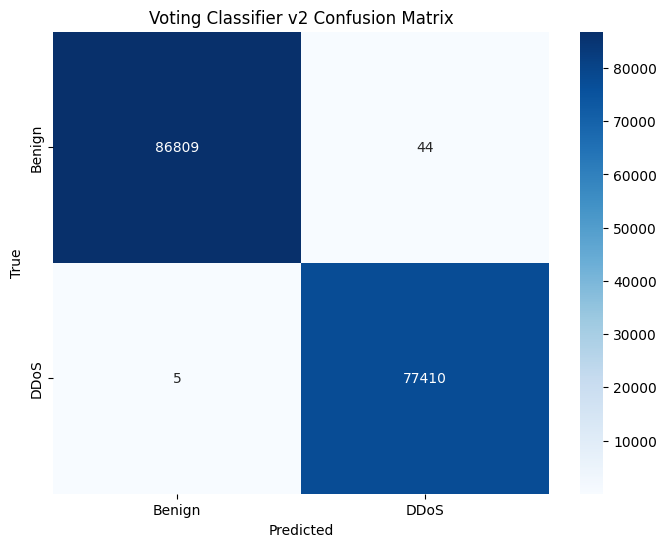

In [39]:
# Confusion Matrix for new voting classifier
plot_confusion_matrix(y_test, y_pred, ['Benign', 'DDoS'], 'Voting Classifier v2 Confusion Matrix')